In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [19]:
df = pd.read_csv("../data/processed/ethiopia_fi_unified_data_enriched.csv")

print(df.shape)
df.head()

(47, 34)


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,unit,observation_date,period_start,period_end,fiscal_year,gender,location,region,source_name,source_type,source_url,confidence,related_indicator,relationship_type,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,%,2014-12-31,NaN,NaN,2014,all,national,NaN,Global Findex 2014,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,%,2017-12-31,NaN,NaN,2017,all,national,NaN,Global Findex 2017,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,all,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,male,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,female,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


In [20]:
obs = df[df["record_type"] == "observation"]
events = df[df["record_type"] == "event"]
links = df[df["record_type"] == "impact_link"]


In [21]:
df["record_type"].value_counts()


record_type
observation    32
event          11
target          3
impact_link     1
Name: count, dtype: int64

In [22]:
obs["pillar"].value_counts()


pillar
ACCESS           14
USAGE            11
GENDER            4
enabler           2
AFFORDABILITY     1
Name: count, dtype: int64

In [23]:
obs["confidence"].value_counts()


confidence
high      28
medium     4
Name: count, dtype: int64

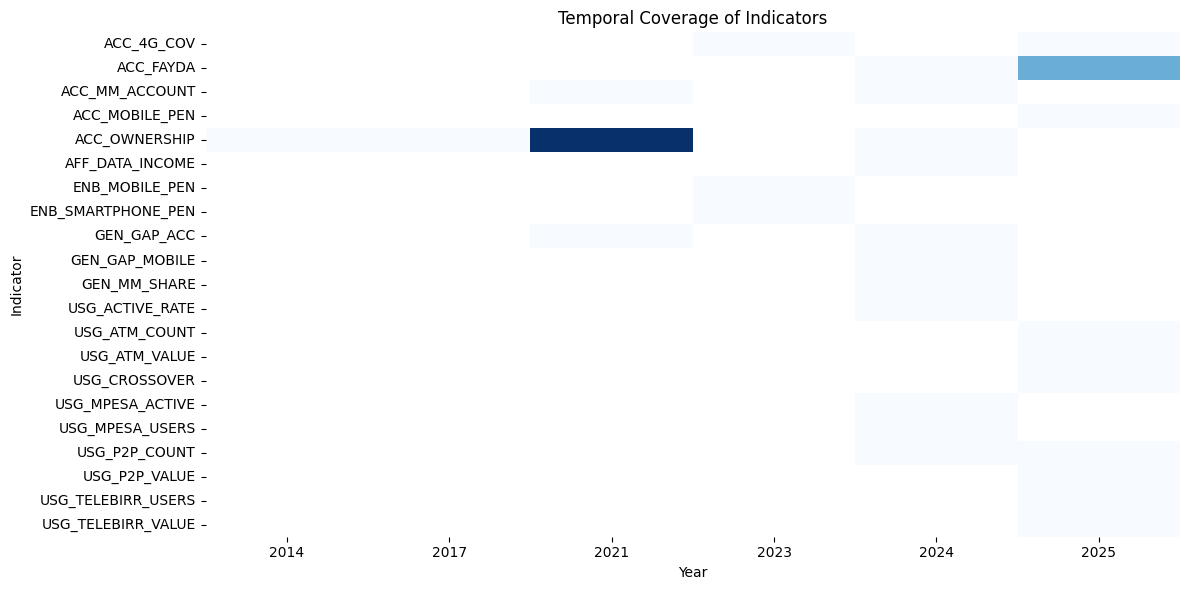

In [24]:
obs["year"] = pd.to_datetime(obs["observation_date"], errors="coerce").dt.year

coverage = obs.pivot_table(
    index="indicator_code",
    columns="year",
    values="value_numeric",
    aggfunc="count"
)

plt.figure(figsize=(12, 6))
sns.heatmap(coverage, cmap="Blues", cbar=False)
plt.title("Temporal Coverage of Indicators")
plt.xlabel("Year")
plt.ylabel("Indicator")
plt.tight_layout()
plt.show()


In [25]:
access = obs[obs["indicator_code"] == "ACC_OWNERSHIP"].copy()
access = access.sort_values("observation_date")


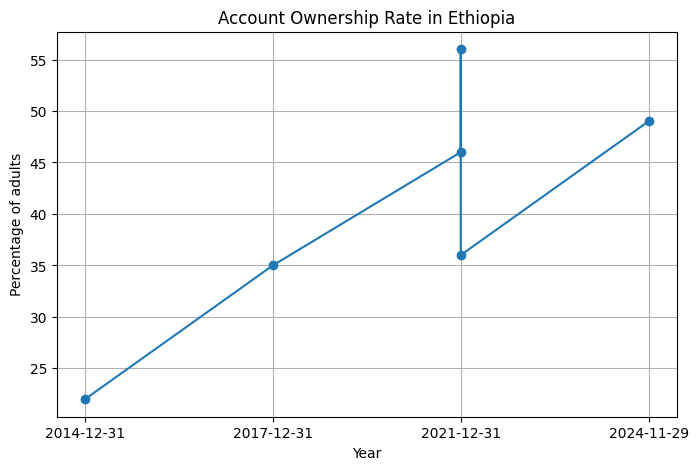

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(access["observation_date"], access["value_numeric"], marker="o")
plt.title("Account Ownership Rate in Ethiopia")
plt.ylabel("Percentage of adults")
plt.xlabel("Year")
plt.grid(True)
plt.show()


In [26]:
access["growth_pp"] = access["value_numeric"].diff()
access[["observation_date", "value_numeric", "growth_pp"]]


,observation_date,value_numeric,growth_pp
0,2014-12-31,22.0,NaN
1,2017-12-31,35.0,13.0
2,2021-12-31,46.0,11.0
3,2021-12-31,56.0,10.0
4,2021-12-31,36.0,-20.0
5,2024-11-29,49.0,13.0


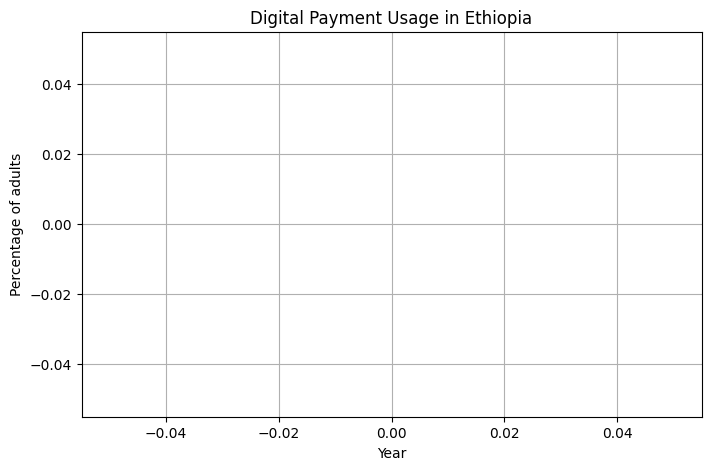

In [27]:
usage = obs[obs["indicator_code"] == "USG_DIGITAL_PAYMENT"].copy()
usage = usage.sort_values("observation_date")

plt.figure(figsize=(8, 5))
plt.plot(usage["observation_date"], usage["value_numeric"], marker="o", color="green")
plt.title("Digital Payment Usage in Ethiopia")
plt.ylabel("Percentage of adults")
plt.xlabel("Year")
plt.grid(True)
plt.show()


In [ ]:
mm = obs[obs["indicator_code"] == "ACC_MM_ACCOUNT"]

plt.figure(figsize=(8, 5))
plt.plot(mm["observation_date"], mm["value_numeric"], label="Mobile Money Accounts")
plt.plot(usage["observation_date"], usage["value_numeric"], label="Digital Payment Usage")
plt.legend()
plt.title("Registered vs Usage Gap")
plt.grid(True)
plt.show()
